In [1]:
import pandas as pd 
import numpy as np 

# Jamalon Dataset 

The dataset that we used in our project is from Kaggle. It contains more than 8000 Arabic books. Each row represents a book and displays its information. This data set has about 8986 books and 13 different categories. 

In [3]:
df = pd.read_csv('/Users/mustaphaamine/Desktop/emines/CI 3A/DS/portfolio/jamalon7.csv',index_col = False )

In [4]:
df = df.drop('Unnamed: 0', axis =1)

Now, let’s take a quick look at the dataset.

In [5]:
df.reset_index(drop=True)

,Unnamed: 0.1,Title,Author,Description,Pages,Publication year,Publisher,Cover,Category,Subcategory,Price
0,0,فى فقه الصراع على القدس وفلسطين,محمد عمارة,الإسلامية كانت القدس رمز الصراع وبوابة الانتص...,180,2006,دار الشروق – مصر,غلاف ورقي,الأدب والخيال,الأدب الإسلامي,15.00
1,6,عذراء قريش,جرجي زيدان,"روايات تاريخ الإسلام"" سلسلة من الروايات التار...",176,0,دار البشير للطباعة والنشر والتوزيع,غلاف عادي,الأدب والخيال,الأدب الإسلامي,18.75
2,13,نفحات من الأدب الإسلامي,محمد الصابوني,ھﺬه ﻣﺬﻛﺮات ﻓﻲ اﻷدب اﻹﺳﻼﻣﻲ، وﺿﻌﮫﺎ اﻟﻤﺆﻟﻒ ﻟﻄﻼﺑﻪ...,168,1996,دار البشائر الإسلامية للطباعة والنشر والتوزيع,غلاف ورقي,الأدب والخيال,الأدب الإسلامي,18.75
3,18,بسط الأعذار عن حب العذار,بدر الدين المنهاجي,كتاب في الادب وصفه المؤلف بعد أن أطلع على كتا...,464,2016,دار الكتب العلمية,غلاف كرتوني,الأدب والخيال,الأدب الإسلامي,45.00
4,21,قصة كاملة... لم يؤلفها بشر,علي الطنطاوي,قصة حقيقية شهد نهايتها العلامة الدمشقي علي ال...,34,2004,دار ابن حزم للطباعة والنشر والتوزيع,غلاف ورقي,الأدب والخيال,الأدب الإسلامي,1.50
5,22,أسير المتمهدي,جرجي زيدان,"روايات تاريخ الإسلام"" سلسلة من الروايات التار...",144,0,دار البشير للطباعة والنشر والتوزيع,غلاف عادي,الأدب والخيال,الأدب الإسلامي,18.75
6,26,ما قرأت في الصحن الحيدري لشعراء المنبر الحسيني,محمد العوادي,مجموعة من القصائد لعدد من الشعراء الحسينين من...,512,2009,مؤسسة البلاغ للطباعة والنشر والتوزيع,غلاف كرتوني,الأدب والخيال,الأدب الإسلامي,45.00
7,27,فن الذكر والدعاء عند خاتم الأنبياء,محمد الغزالي,تتوه النفس فى إنبهار عندما تطمئن بين يدى النب...,192,2014,دار الشروق – مصر,غلاف ورقي,الأدب والخيال,الأدب الإسلامي,24.00
8,28,نحن والقران ومتغيرات عصر المعرفة,محمد عدنان سالم,كتاب هام يسعى الكاتب من خلاله لتقديم مشروع جد...,118,2016,دار الفكر آفاق معرفة متجددة,غلاف ورقي,الأدب والخيال,الأدب الإسلامي,26.25
9,30,الإيمان مفتاح السعادة النفسية,محمد سالم,فى كتابه (الإيمان مفتاح السعادة النفسية) يؤكد...,364,2011,دار الكتاب الجامعي للطباعة والنشر والتوزيع,غلاف ورقي,الأدب والخيال,الأدب الإسلامي,37.50


### Categories

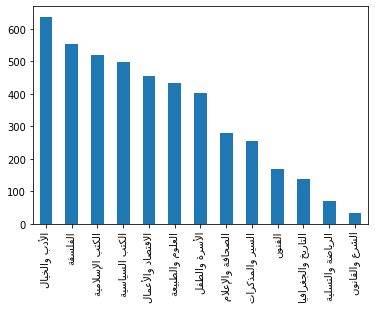

In [8]:
import arabic_reshaper
import matplotlib.pyplot as plt
from bidi.algorithm import get_display
a = df.Category.values
x = []
for item in df.Category.values:
    x.append(get_display(arabic_reshaper.reshape(item)))
df['reshaped'] = x
df['reshaped'].value_counts().plot(kind='bar')

# The Challenge 

The problem that we are going to be tackling is to predict the category of books using only the description without the actual content of the book itself, the data that we have for learning is actually in arabic and it's pretty sparse, a problem you may encounter in the real world. In our project we faced so many challenges in order to implement a better classifier. 

To summarise our data is associated with the following challenges:
<br>
-Unstructured language 
<br>
-Orthographic mistakes
<br>
-Spelling inconsistencies
<br>
-Unknown caracters
<br>
-Repeated letters and with spaces in the words 

# Data Cleaning

### Remove Na

In [9]:
df.drop(df[df.Description == " None"].index, inplace=True)
df = df.dropna()
df = df.reset_index(drop=True)

In [10]:
(df.isnull().sum()/len(df))*100

Unnamed: 0.1        0.0
Title               0.0
Author              0.0
Description         0.0
Pages               0.0
Publication year    0.0
Publisher           0.0
Cover               0.0
Category            0.0
Subcategory         0.0
Price               0.0
reshaped            0.0
dtype: float64

### Remove unknown values 

#### Covers

In [11]:
set(df.Cover.values)

{' 9789957026608',
 ' Hard Cover',
 ' Hardback',
 ' Hardcover',
 ' Paperback',
 ' u200eغلاف ورقيu200e',
 ' الأولى',
 ' تجليد فني',
 ' عادي',
 ' غلاف',
 ' غلاف عادي',
 ' غلاف فني',
 ' غلاف كرتوني',
 ' غلاف ورقي',
 ' غير متوفر',
 ' لا يوجد',
 'الأولى',
 'غلاف عادي',
 'غلاف فني',
 'غلاف كرتوني',
 'غلاف ورقي',
 'غير متوفر',
 'كتاب مسموع أجزاء: 2'}

In [12]:
#Before cleanup
print('#Of covers before cleanup: ',len(set(df.Cover.values)))

#Do some basic data cleanup:
def covertype(x):
    x = str(x).strip().lower()
    if x=='Hard Cover' or x=='HardCover' or x=='hardcover' or x=='hard cover' or x== 'مقوى':
        return 'hardcover'
    if x=='Paperback' or x=='paperback' or x=='غلاف ورقي' or x=='غلاف ورقي':
        return 'paperback'
    if x=='عادي' or x=='غلاف عادي' or x=='غلاف':
        return 'standard'
    return x
df.Cover=df.Cover.apply(lambda x: covertype(x))


print('#Of covers after cleanup: ',len(set(df.Cover.values)))

print(set(df.Cover.values))

#Of covers before cleanup:  23
#Of covers after cleanup:  13
{'standard', 'الأولى', 'hardback', 'hardcover', 'كتاب مسموع أجزاء: 2', 'غلاف كرتوني', 'paperback', '9789957026608', 'u200eغلاف ورقيu200e', 'غير متوفر', 'غلاف فني', 'تجليد فني', 'لا يوجد'}


#### Authors 

In [13]:
#authors

a=set(df.Author.values)
a
print('Unique Authors before cleanup: ', len(a))
#display first 20
list(set(df.Author.values))[:20]

Unique Authors before cleanup:  3346


[' تيموثي ميتشل',
 ' إيمان الخفاف',
 ' قارة وليد',
 ' أليف شافاك',
 ' راجي البياتي',
 ' أنس طبارة',
 'مصطفى جولي',
 'عبده كوشك',
 ' زينب عبد الرزاق',
 ' عزة القصابي',
 ' علي السيستاني',
 ' Nestor D.pagano',
 ' اسكندر بشير',
 ' ياسين العيثاوي ، سلام المشهداني',
 ' أحمد الأهدل',
 ' صبحي ناظم توفيق',
 'جورج طرابيشي',
 ' ريتشارد ل. بوردين، ج. دوغلاس فايرس',
 ' تينا نوبولا',
 ' سعيد الرحباوي']

## Text preprocessing

### Text Correction 

The TextCorrection class tries to choose the most likely spelling correction for a word, it's a class from **textblob-ar** library. 

In this function, they are trying to find the correction c out of all possible candidate corrections by maximizing the probability that c is the intended correction to the original word. 

In [14]:
import re
from collections import Counter


class TextCorrection:

    def __init__(self):
        wl1 = Counter(self.words(open('/Users/lamiaeaitmbirik/Desktop/bbc-arabic-wordlist-frequency.csv').read()))
        wl2 = Counter(self.words(open('/Users/lamiaeaitmbirik/Desktop/OSAc-wordlist 2.csv').read()))
        wl3 = Counter(self.words(open('/Users/lamiaeaitmbirik/Desktop/cnn-arabic-wordlist.csv').read()))
        
        self.WORDS = wl1 + wl2 + wl3

    def words(self, text):
        return re.findall(r'\w+', text.lower())

    def P(self, word): 
        "Probability of `word`."
        N = sum(self.WORDS.values())
        return self.WORDS[word] / N

    def correction(self, word, top=False):
        "Most probable spelling correction for word."
        if top:
            return max(self.candidates(word), key=self.P)
        return self.candidates(word)

    def candidates(self, word):
        "Generate possible spelling corrections for word."
        return (self.known([word]) or self.known(self.edits1(word)) or self.known(self.edits2(word)) or [word])

    def known(self, words):
        "The subset of `words` that appear in the dictionary of WORDS."
        return set(w for w in words if w in self.WORDS)

    def edits1(self, word):
        "All edits that are one edit away from `word`."
        letters    = 'غظضذخثتشرقصفعسنملكيطحزوهدجبأ'
        splits     = [(word[:i], word[i:])    for i in range(len(word) + 1)]
        deletes    = [L + R[1:]               for L, R in splits if R]
        transposes = [L + R[1] + R[0] + R[2:] for L, R in splits if len(R)>1]
        replaces   = [L + c + R[1:]           for L, R in splits if R for c in letters]
        inserts    = [L + c + R               for L, R in splits for c in letters]
        return set(deletes + transposes + replaces + inserts)

    def edits2(self, word): 
        "All edits that are two edits away from `word`."
        return (e2 for e1 in self.edits1(word) for e2 in self.edits1(e1))

### Text cleaning 

For this particular data set, our text cleaning step includes normalize text, remove punctuation, remove bad characters, and so on.

In [15]:
import re
import string
import sys
import argparse

- Noise removal

In [16]:
arabic_diacritics = re.compile("""
                             ّ    | # Tashdid
                             َ    | # Fatha
                             ً    | # Tanwin Fath
                             ُ    | # Damma
                             ٌ    | # Tanwin Damm
                             ِ    | # Kasra
                             ٍ    | # Tanwin Kasr
                             ْ    | # Sukun
                             ـ     # Tatwil/Kashida
                         """, re.VERBOSE)


def remove_diacritics(text):
    text = re.sub(arabic_diacritics, '', text)
    return text

- Remove_punctuations

In [17]:
arabic_punctuations = '''`÷×؛<>_()*&^%][ـ،/:"؟.,'{}~¦+|!”…“–ـ«»'''
english_punctuations = string.punctuation
punctuations_list = arabic_punctuations + english_punctuations

def remove_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)

- Remove repeated caracters

In [18]:
def remove_repeating_char(text):
    return re.sub(r'(.)\1+', r'\1', text)

We apply all the functions to our dataset.

In [19]:
df['description_cleaned'] = ''

for i in range(len(df.Description)):
    text=remove_punctuations(df.iloc[i]['Description'])
    text=remove_diacritics(text)
    text=remove_repeating_char(text)
    df['description_cleaned'][i] = text

/Users/lamiaeaitmbirik/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


### Tokenization

This function allows us to break up the text into units called tokens.

In [20]:
from nltk import word_tokenize
df['description_tokens'] = ''
for i in range(len(df)):
    word_tokens = word_tokenize(df.description_cleaned.values[i])
    df['description_tokens'][i] = word_tokens

/Users/lamiaeaitmbirik/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [21]:
TextCorr = TextCorrection()
df['description_corrected'] = 'default value'
for i in range(len(df)):
    L = []
    for j in range(len(df.description_tokens[i])):
        text = df.description_tokens[i][j]
        L1 = TextCorr.correction(str(text), top=True)
        L.append(L1)
    df['description_corrected'][i] = L

/Users/lamiaeaitmbirik/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


### Remove Stop words

Stopwords are the unnecessary words that even if they are removed the meaning of the sentence doesn't change. In order to have the maximum number of arabic stop words, we merged two text files and we removed repeated values. 

In [22]:
f = open("/Users/lamiaeaitmbirik/Downloads/list.txt", "r")
lines_list = open('/Users/lamiaeaitmbirik/Downloads/list.txt').read().splitlines()
g = pd.read_csv('/Users/lamiaeaitmbirik/Downloads/arabicstopwords0.3 3/data/classified/stopword0.6.csv',sep=';')

In [23]:
stop_words = g.iloc[:, 0] 
stop_words = stop_words.tolist()
stop_words = stop_words+lines_list

In [24]:
df["Description_Parsed_12"] = ""

for i in range(len(df)):
    word_tokens = df.description_corrected.values[i]
    filtered_sentence = [w for w in word_tokens if not w in stop_words]
    df['Description_Parsed_12'][i] = filtered_sentence

/Users/lamiaeaitmbirik/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


### StanfordPOSTagger

We worked with a class for pos tagging with Stanford Tagger. The input is the paths to a model trained on training data and the path to the stanford tagger jar file. 
<br>
<br>


**POS tagging performance :** Tag accuracy = 90%

**Results signification :** 
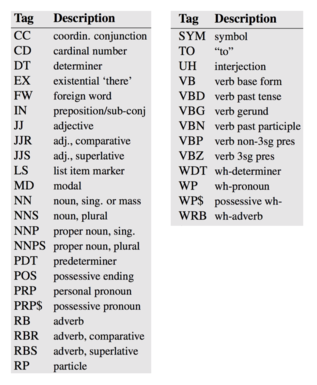

In [68]:
import os
java_path = "C:\\Program Files (x86)\\Java\\jdk1.8.0_112\\bin\\java.exe"
os.environ['JAVAHOME'] = java_path

In [72]:
from nltk.tag.stanford import StanfordPOSTagger

path_to_model = "/Users/lamiaeaitmbirik/Desktop/stanford-postagger-full-2017-06-09/models/arabic.tagger"
path_to_jar = "/Users/lamiaeaitmbirik/Desktop/stanford-postagger-full-2017-06-09/stanford-postagger.jar"
tagger=StanfordPOSTagger(path_to_model, path_to_jar)
tagger.java_options='-mx4096m'  
L1=[]
for i in range(len(df.Description2_Parsed_20_unlist)):
    sentence = df.Description2_Parsed_20_unlist[i]
    L1.append(tagger.tag(sentence.split()))
df['Postagged']=L1 

In [73]:
df.Postagged[1]

[('', 'روا/VBD'),
 ('', 'تاريخ/NN'),
 ('', 'إسلام/NN'),
 ('', 'سلسل/NN'),
 ('', 'روا/VBD'),
 ('', 'تاريخ/NN'),
 ('', 'تصور/NN'),
 ('', 'مراحل/NN'),
 ('', 'تاريخ/NN'),
 ('', 'إسلام/NN'),
 ('', 'ظهور/NN'),
 ('', 'إسلام/NN'),
 ('', 'روع/NN'),
 ('', 'عنصر/NN'),
 ('', 'تشويق/NN'),
 ('', 'تزام/NN'),
 ('', 'حوادث/NN'),
 ('', 'تاريخ/NN'),
 ('', 'تزاما/NN'),
 ('', 'دقيقا/JJ'),
 ('', 'أشخاص/JJ'),
 ('', 'وصف/VBD'),
 ('', 'يتخذ/VBP'),
 ('', 'عاد/VBD'),
 ('', 'أخلاق/NN'),
 ('', 'كتاب/NN'),
 ('', 'عذراء/JJ'),
 ('', 'قريش/NNP'),
 ('', 'يدخل/VBP'),
 ('', 'كتب/NN'),
 ('', 'سلسل/NN'),
 ('', 'يؤرخ/VBP'),
 ('', 'لمقتل/NNP'),
 ('', 'خليف/NNP'),
 ('', 'عثم/NNP'),
 ('', 'خلاف/NN'),
 ('', 'إمام/NN'),
 ('', 'وما/NN'),
 ('', 'نجم/NN'),
 ('', 'فتن/NN'),
 ('', 'اقعت/VBD'),
 ('', 'جمل/NN'),
 ('', 'تحكيم/NN'),
 ('', 'حكم/NN'),
 ('', 'خروج/NN'),
 ('', 'مصر/NNP'),
 ('', 'خلاف/NN'),
 ('', 'إمام/NN'),
 ('', 'عرض/NN'),
 ('', 'تزاما/NN'),
 ('', 'دقيقا/JJ'),
 ('', 'أشخاص/JJ'),
 ('', 'وصف/VBD'),
 ('', 'يتخذ/VBP'),
 ('', 'ع

In [289]:
df.Postagged[1]

[('', 'روا/VBD'),
 ('', 'تاريخ/NN'),
 ('', 'إسلام/NN'),
 ('', 'سلسل/NN'),
 ('', 'روا/VBD'),
 ('', 'تاريخ/NN'),
 ('', 'تصور/NN'),
 ('', 'مراحل/NN'),
 ('', 'تاريخ/NN'),
 ('', 'إسلام/NN'),
 ('', 'ظهور/NN'),
 ('', 'إسلام/NN'),
 ('', 'روع/NN'),
 ('', 'عنصر/NN'),
 ('', 'تشويق/NN'),
 ('', 'تزام/NN'),
 ('', 'حوادث/NN'),
 ('', 'تاريخ/NN'),
 ('', 'تزاما/NN'),
 ('', 'دقيقا/JJ'),
 ('', 'أشخاص/JJ'),
 ('', 'وصف/VBD'),
 ('', 'يتخلوا/VBP'),
 ('', 'عاد/VBD'),
 ('', 'أخلاق/NN'),
 ('', 'كتاب/NN'),
 ('', 'عذراء/JJ'),
 ('', 'قريش/NNP'),
 ('', 'يدخل/VBP'),
 ('', 'كتب/NN'),
 ('', 'سلسل/NN'),
 ('', 'يؤرخ/VBP'),
 ('', 'لمقتل/NNP'),
 ('', 'خليف/NNP'),
 ('', 'عثم/NNP'),
 ('', 'خلاف/NN'),
 ('', 'إمام/NN'),
 ('', 'وما/NN'),
 ('', 'نجم/NN'),
 ('', 'فتن/NN'),
 ('', 'اقعت/VBD'),
 ('', 'جمل/NN'),
 ('', 'تحكيم/NN'),
 ('', 'حكم/NN'),
 ('', 'خروج/NN'),
 ('', 'مصر/NNP'),
 ('', 'خلاف/NN'),
 ('', 'إمام/NN'),
 ('', 'عرض/NN'),
 ('', 'تزاما/NN'),
 ('', 'دقيقا/JJ'),
 ('', 'أشخاص/JJ'),
 ('', 'وصف/VBD'),
 ('', 'يتخلوا/VBP'),
 (''

### Lemmatization

In [33]:
import re

SPACE            = u'\u0020'
EXCLAMATION      = u'\u0021'
en_QUOTATION     = u'\u0022'
NUMBER_SIGN      = u'\u0023'
DOLLAR_SIGN      = u'\u0024'
en_PERCENT       = u'\u0025' #unichr(37)
AMPERSAND        = u'\u0026'
APOSTROPHE       = u'\u0027' #unichr(39)
LEFT_PARENTHESIS = u'\u0028'
RIGHT_PARENTHESIS= u'\u0029'
ASTERISK         = u'\u002a' #unichr(42)
PLUS_SIGN        = u'\u002b'
en_COMMA         = u'\u002c'
HYPHEN_MINUS     = u'\u002d' #unichr(45)
en_FULL_STOP     = u'\u002e'
SLASH            = u'\u002f'
# English Numbers
ZERO             = u'\u0030'
ONE              = u'\u0031'
TWO              = u'\u0032'
THREE            = u'\u0033'
FOUR             = u'\u0034'
FIVE             = u'\u0035'
SIX              = u'\u0036'
SEVEN            = u'\u0037'
EIGHT            = u'\u0038'
NINE             = u'\u0039'

en_COLON             = u'\u003a' #unichr(58)
en_SEMICOLON         = u'\u003b' 
en_LESS_THAN         = u'\u003c' #unichr(60)
en_EQUALS_SIGN       = u'\u003d' #
en_GREATER_THAN      = u'\u003e' #
en_QUESTION          = u'\u003f'
COMMERCIAL_AT        = u'\u0040'

LEFT_SQUARE_BRACKET  = u'\u005b'
BACKSLASH            = u'\u005c'
RIGHT_SQUARE_BRACKET = u'\u005d'
CIRCUMFLEX_ACCENT    = u'\u005e'
UNDERSCORE           = u'\u005f'
GRAVE_ACCENT         = u'\u0060'

LEFT_CURLY_BRACKET   = u'\u007b'
VERTICAL_LINE        = u'\u007c'
RIGHT_CURLY_BRACKET  = u'\u007d'
TILDE                = u'\u007e'

Leftpointing_double_angle_quotation_mark  = u'\u00ab'
MIDDLE_DOT                                = u'\u00b7' #unichr(183)
Rightpointing_double_angle_quotation_mark = u'\u00bb'

ar_COMMA         = u'\u060c'
ar_DATE_SEPARATO = u'\u060d'
ar_SEMICOLON     = u'\u061b'
ar_QUESTION      = u'\u061f' #QUESTION
HAMZA            = u'\u0621'
ALEF_MADDA       = u'\u0622'
ALEF_HAMZA_ABOVE = u'\u0623'
WAW_HAMZA        = u'\u0624'
ALEF_HAMZA_BELOW = u'\u0625'
YEH_HAMZA        = u'\u0626'
ALEF             = u'\u0627'
BEH              = u'\u0628'
TEH_MARBUTA      = u'\u0629'
TEH              = u'\u062a'
THEH             = u'\u062b'
JEEM             = u'\u062c'
HAH              = u'\u062d'
KHAH             = u'\u062e'
DAL              = u'\u062f'
THAL             = u'\u0630'
REH              = u'\u0631'
ZAIN             = u'\u0632'
SEEN             = u'\u0633'
SHEEN            = u'\u0634'
SAD              = u'\u0635'
DAD              = u'\u0636'
TAH              = u'\u0637'
ZAH              = u'\u0638'
AIN              = u'\u0639'
GHAIN            = u'\u063a'
TATWEEL          = u'\u0640'
FEH              = u'\u0641'
QAF              = u'\u0642'
KAF              = u'\u0643'
LAM              = u'\u0644'
MEEM             = u'\u0645'
NOON             = u'\u0646'
HEH              = u'\u0647'
WAW              = u'\u0648'
ALEF_MAKSURA     = u'\u0649'
YEH              = u'\u064a'
MADDA_ABOVE      = u'\u0653'
HAMZA_ABOVE      = u'\u0654'
HAMZA_BELOW      = u'\u0655'

ar_ZERO          = u'\u0660'
ar_ONE           = u'\u0661'
ar_TWO           = u'\u0662'
ar_THREE         = u'\u0663'
ar_FOUR          = u'\u0664'
ar_FIVE          = u'\u0665'
ar_SIX           = u'\u0666'
ar_SEVEN         = u'\u0667'
ar_EIGHT         = u'\u0668'
ar_NINE          = u'\u0669'

ar_PERCENT       = u'\u066a' #PERCENT 
ar_DECIMAL       = u'\u066b'
ar_THOUSANDS     = u'\u066c'
ar_STAR          = u'\u066d'
MINI_ALEF        = u'\u0670'
ALEF_WASLA       = u'\u0671'
ar_FULL_STOP     = u'\u06d4' #FULL_STOP
BYTE_ORDER_MARK  = u'\ufeff'

# Diacritics
FATHATAN         = u'\u064b'
DAMMATAN         = u'\u064c'
KASRATAN         = u'\u064d'
FATHA            = u'\u064e'
DAMMA            = u'\u064f'
KASRA            = u'\u0650'
SHADDA           = u'\u0651'
SUKUN            = u'\u0652'

# Small Letters
SMALL_ALEF      =u"\u0670"
SMALL_WAW       =u"\u06E5"
SMALL_YEH       =u"\u06E6"
#Ligatures
LAM_ALEF                    =u'\ufefb'
LAM_ALEF_HAMZA_ABOVE        =u'\ufef7'
LAM_ALEF_HAMZA_BELOW        =u'\ufef9'
LAM_ALEF_MADDA_ABOVE        =u'\ufef5'
simple_LAM_ALEF             =u'\u0644\u0627'
simple_LAM_ALEF_HAMZA_ABOVE =u'\u0644\u0623'
simple_LAM_ALEF_HAMZA_BELOW =u'\u0644\u0625'
simple_LAM_ALEF_MADDA_ABOVE =u'\u0644\u0622'

Left_double_quotation_mark  = u'\u201c' #unichr(8220)
Right_double_quotation_mark = u'\u201d' #unichr(8221)
BULLET                      = u'\u2022'

# groups
LETTERS=u''.join([
        ALEF , BEH , TEH  , TEH_MARBUTA  , THEH  , JEEM  , HAH , KHAH ,
        DAL   , THAL  , REH   , ZAIN  , SEEN   , SHEEN  , SAD , DAD , TAH   , ZAH   ,
        AIN   , GHAIN   , FEH  , QAF , KAF , LAM , MEEM , NOON, HEH , WAW, YEH  ,
        HAMZA  ,  ALEF_MADDA , ALEF_HAMZA_ABOVE , WAW_HAMZA   , ALEF_HAMZA_BELOW  , YEH_HAMZA  ,
        ])

TASHKEEL =(FATHATAN, DAMMATAN, KASRATAN,
            FATHA,DAMMA,KASRA,
            SUKUN,
            SHADDA);
HARAKAT =(  FATHATAN,   DAMMATAN,   KASRATAN,
            FATHA,  DAMMA,  KASRA,
            SUKUN
            );
SHORTHARAKAT =( FATHA,  DAMMA,  KASRA, SUKUN);

TANWIN =(FATHATAN,  DAMMATAN,   KASRATAN);


LIGUATURES=(
            LAM_ALEF,
            LAM_ALEF_HAMZA_ABOVE,
            LAM_ALEF_HAMZA_BELOW,
            LAM_ALEF_MADDA_ABOVE,
            );
HAMZAT=(
            HAMZA,
            WAW_HAMZA,
            YEH_HAMZA,
            HAMZA_ABOVE,
            HAMZA_BELOW,
            ALEF_HAMZA_BELOW,
            ALEF_HAMZA_ABOVE,
            );
ALEFAT=(
            ALEF,
            ALEF_MADDA,
            ALEF_HAMZA_ABOVE,
            ALEF_HAMZA_BELOW,
            ALEF_WASLA,
            ALEF_MAKSURA,
            SMALL_ALEF,

        );
WEAK   = ( ALEF, WAW, YEH, ALEF_MAKSURA);
YEHLIKE= ( YEH,  YEH_HAMZA,  ALEF_MAKSURA,   SMALL_YEH  );

WAWLIKE     =   ( WAW,  WAW_HAMZA,  SMALL_WAW );
TEHLIKE     =   ( TEH,  TEH_MARBUTA );

SMALL   =( SMALL_ALEF, SMALL_WAW, SMALL_YEH)
MOON =(HAMZA            ,
        ALEF_MADDA       ,
        ALEF_HAMZA_ABOVE ,
        ALEF_HAMZA_BELOW ,
        ALEF             ,
        BEH              ,
        JEEM             ,
        HAH              ,
        KHAH             ,
        AIN              ,
        GHAIN            ,
        FEH              ,
        QAF              ,
        KAF              ,
        MEEM             ,
        HEH              ,
        WAW              ,
        YEH
    );
SUN=(
        TEH              ,
        THEH             ,
        DAL              ,
        THAL             ,
        REH              ,
        ZAIN             ,
        SEEN             ,
        SHEEN            ,
        SAD              ,
        DAD              ,
        TAH              ,
        ZAH              ,
        LAM              ,
        NOON             ,
    );
AlphabeticOrder={
                ALEF             : 1,
                BEH              : 2,
                TEH              : 3,
                TEH_MARBUTA      : 3,
                THEH             : 4,
                JEEM             : 5,
                HAH              : 6,
                KHAH             : 7,
                DAL              : 8,
                THAL             : 9,
                REH              : 10,
                ZAIN             : 11,
                SEEN             : 12,
                SHEEN            : 13,
                SAD              : 14,
                DAD              : 15,
                TAH              : 16,
                ZAH              : 17,
                AIN              : 18,
                GHAIN            : 19,
                FEH              : 20,
                QAF              : 21,
                KAF              : 22,
                LAM              : 23,
                MEEM             : 24,
                NOON             : 25,
                HEH              : 26,
                WAW              : 27,
                YEH              : 28,
                HAMZA            : 29,

                ALEF_MADDA       : 29,
                ALEF_HAMZA_ABOVE : 29,
                WAW_HAMZA        : 29,
                ALEF_HAMZA_BELOW : 29,
                YEH_HAMZA        : 29,
                }
NAMES ={
                ALEF             :  u"ألف",
                BEH              : u"باء",
                TEH              : u'تاء' ,
                TEH_MARBUTA      : u'تاء مربوطة' ,
                THEH             : u'ثاء' ,
                JEEM             : u'جيم' ,
                HAH              : u'حاء' ,
                KHAH             : u'خاء' ,
                DAL              : u'دال' ,
                THAL             : u'ذال' ,
                REH              : u'راء' ,
                ZAIN             : u'زاي' ,
                SEEN             : u'سين' ,
                SHEEN            : u'شين' ,
                SAD              : u'صاد' ,
                DAD              : u'ضاد' ,
                TAH              : u'طاء' ,
                ZAH              : u'ظاء' ,
                AIN              : u'عين' ,
                GHAIN            : u'غين' ,
                FEH              : u'فاء' ,
                QAF              : u'قاف' ,
                KAF              : u'كاف' ,
                LAM              : u'لام' ,
                MEEM             : u'ميم' ,
                NOON             : u'نون' ,
                HEH              : u'هاء' ,
                WAW              : u'واو' ,
                YEH              : u'ياء' ,
                HAMZA            : u'همزة' ,

                TATWEEL          : u'تطويل' ,
                ALEF_MADDA       : u'ألف ممدودة' ,
                ALEF_MAKSURA      : u'ألف مقصورة' ,
                ALEF_HAMZA_ABOVE : u'همزة على الألف' ,
                WAW_HAMZA        : u'همزة على الواو' ,
                ALEF_HAMZA_BELOW : u'همزة تحت الألف' ,
                YEH_HAMZA        : u'همزة على الياء' ,
                FATHATAN         : u'فتحتان',
                DAMMATAN         : u'ضمتان',
                KASRATAN         : u'كسرتان',
                FATHA            : u'فتحة',
                DAMMA            : u'ضمة',
                KASRA            : u'كسرة',
                SHADDA           : u'شدة',
                SUKUN            : u'سكون',
                }
#!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~
PUNCTUATIONS = (ar_COMMA, ar_SEMICOLON, ar_QUESTION, ar_PERCENT, ar_DECIMAL,
                ar_THOUSANDS, ar_FULL_STOP,
                
                EXCLAMATION, en_QUOTATION, NUMBER_SIGN, DOLLAR_SIGN, en_PERCENT,
                AMPERSAND, LEFT_PARENTHESIS, RIGHT_PARENTHESIS,
                ASTERISK, PLUS_SIGN, en_COMMA, HYPHEN_MINUS, en_FULL_STOP,
                SLASH, en_COLON, en_SEMICOLON, en_LESS_THAN, en_EQUALS_SIGN,
                en_GREATER_THAN, en_QUESTION, COMMERCIAL_AT, LEFT_SQUARE_BRACKET,
                BACKSLASH, RIGHT_SQUARE_BRACKET, CIRCUMFLEX_ACCENT, UNDERSCORE,
                GRAVE_ACCENT, LEFT_CURLY_BRACKET, VERTICAL_LINE,
                RIGHT_CURLY_BRACKET, TILDE, Leftpointing_double_angle_quotation_mark,
                MIDDLE_DOT, Rightpointing_double_angle_quotation_mark ) #APOSTROPHE


def isHaraka(archar):
    if archar in HARAKAT:
        return True;
    else: return False;

def isArabicword(word):

    if len(word)==0 : return False;
    elif re.search(u"([^\u0600-\u0652%s%s%s])"%(LAM_ALEF, LAM_ALEF_HAMZA_ABOVE,LAM_ALEF_MADDA_ABOVE),word):
        return False;
    elif isHaraka(word[0]) or word[0] in (WAW_HAMZA,YEH_HAMZA):
        return False;
#  if Teh Marbuta or Alef_Maksura not in the end
    elif re.match(u"^(.)*[%s](.)+$"%ALEF_MAKSURA,word):
        return False;
    elif re.match(u"^(.)*[%s]([^%s%s%s])(.)+$"%(TEH_MARBUTA,DAMMA,KASRA,FATHA),word):
        return False;
    else:
        return True;


In [36]:
class Stemmer:
   
    def __init__(self):
        pass

class Lightstemmer(Stemmer):
    larkey_defarticles = (u"ال", u"وال", u"بال", u"كال", u"فال", u"لل")
    larkey_suffixes = (u"ها", u"ان", u"ات", u"ون", u"ين", u"يه", u"ية", u"ه", u"ة", u"ي")

    def __init__(self):
        Stemmer.__init__(self)

    @staticmethod
    def stem_token(token):
        if not isArabicword(token):
            return token
        
        if len(token) > 3 and token[:1] == WAW:
            token = token[1:]
        length = 0
        wordlen = len(token)

        for article in Lightstemmer.larkey_defarticles:
            length = len(article)
            if (wordlen > length + 1) and (token[:length] == article):
                token = token[length:]
                break

        if len(token) > 2:
            wordlen = len(token)
            for suffix in Lightstemmer.larkey_suffixes:
                suflen = len(suffix)
                if (wordlen > len(suffix) + 1) and token.endswith(suffix):
                    token = token[:wordlen - suflen]
                    wordlen = len(token)

        return token
if __name__ == '__main__':
    pass

In [37]:
df['Description2_Parsed_13']=""

Stem = Lightstemmer()

for i in range(len(df)):
    L1=[]
    for j in range(len(df.Description_Parsed_12[i])):
        word = df.Description_Parsed_12[i][j]
        # stemming word
        stem = Stem.stem_token(word)
        # extract stem
        L1.append(stem)
        
    df.set_value(i, 'Description2_Parsed_13', L1)

/Users/lamiaeaitmbirik/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  


In [43]:
def string_unlist(strlist):
    return " ".join(strlist)

df["Description2_Parsed_13_unlist"] = df["Description2_Parsed_13"].apply(string_unlist)

### Remove words with less than 3 caracters

In [38]:
df['Description2_Parsed_14']=""

for i in range(len(df.Description2_Parsed_13[i])):
    word = df.Description2_Parsed_13[i]
    for j in word[:]:
        if len(j) < 3:
            word.remove(j)
    df.set_value(i, 'Description2_Parsed_14', word)

/Users/lamiaeaitmbirik/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  


### Word Cloud

In [75]:
df1=df[df['Category'] ==  'الرياضة والتسلية']

In [80]:
import wordcloud
import nltk
import arabic_reshaper
from nltk import word_tokenize, sent_tokenize
def tokenize_text(text):
    sentences = nltk.sent_tokenize(text)
    word_tokens = [nltk.word_tokenize(sentence) for sentence in sentences]
    return word_tokens
a=[]
for i in range(len(df1)):
    a.append(tokenize_text(df1.Description2_Parsed_13_unlist.values[i])[0])

In [81]:
fr = []
for i in range(len(a)):
    for j in range(len(a[i])):
        d = fr.append(a[i][j])
    fr.append(d)

In [82]:
import arabic_reshaper
import matplotlib.pyplot as plt
from bidi.algorithm import get_display
x = []
for item in fr : 
    x.append(get_display(arabic_reshaper.reshape(item)))

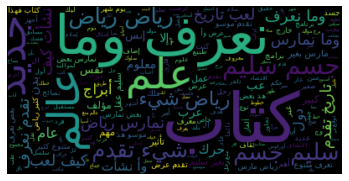

In [84]:
from nltk.tokenize.treebank import TreebankWordDetokenizer
y=TreebankWordDetokenizer().detokenize(x)
from wordcloud import WordCloud 
wordcloud = WordCloud(font_path="/Users/lamiaeaitmbirik/Desktop/tahoma.ttf").generate(y)
import matplotlib.pyplot as plt
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### Word Frequency per Category 

In [41]:
from nltk.probability import FreqDist
labels = ['الأدب والخيال','الفلسفة','الكتب الإسلامية','الكتب السياسية','الاقتصاد والأعمال','العلوم والطبيعة','الأسرة والطفل','الصحافة والإعلام','السير والمذكرات','الفنون','التاريخ والجغرافيا','الرياضة والتسلية','الشرع والقانون']
for k in range(len(labels)):
    l_k = []
    for m in range(len(df)):
        for j in range(len(df.Description2_Parsed_13[m])):
            if df.Category[m] == labels[k]:
                l_k.append(df.Description2_Parsed_13[m][j])
    fdist = FreqDist(l_k)
    print(fdist)
    print(fdist.most_common(10))

<FreqDist with 8521 samples and 35246 outcomes>
[('كتاب', 335), ('عرض', 233), ('قص', 223), ('تاريخ', 209), ('روا', 199), ('مسرح', 181), ('حيا', 143), ('إسلام', 140), ('عرب', 140), ('ال', 128)]
<FreqDist with 8386 samples and 48146 outcomes>
[('فلسف', 877), ('كتاب', 726), ('فكر', 403), ('تاريخ', 295), ('نظر', 278), ('علم', 250), ('نفس', 225), ('عرب', 219), ('منطق', 213), ('عرض', 198)]
<FreqDist with 6409 samples and 29982 outcomes>
[('كتاب', 607), ('ال', 473), ('إسلام', 251), ('عرض', 199), ('مؤلف', 182), ('قرآن', 164), ('سلم', 162), ('صلى', 160), ('علم', 158), ('حديث', 152)]
<FreqDist with 6764 samples and 42101 outcomes>
[('دول', 799), ('سياس', 610), ('كتاب', 580), ('عرب', 421), ('عالم', 327), ('عمل', 197), ('علاق', 190), ('إسلام', 180), ('تاريخ', 168), ('دراس', 168)]
<FreqDist with 5623 samples and 32510 outcomes>
[('كتاب', 393), ('اقتصاد', 338), ('عمل', 316), ('مال', 312), ('عالم', 239), ('إدار', 233), ('دول', 201), ('عرب', 165), ('سياس', 149), ('مصرف', 147)]
<FreqDist with 6357 samp

# Unsupervised outlier detection using Deep Learning 

We will try to detect outliers in our dataset by unsupervised deep learning based technique of outlier detection for text data.

For data exploration, let’s find most frequent 50 words/tokens present in the plots.

In [55]:
from collections import Counter

aggregate_counter = Counter()
for row_index,row in df.iterrows():
    c = Counter(row['Description2_Parsed_13_unlist'].split())
    aggregate_counter += c

common_words = [word[0] for word in aggregate_counter.most_common(50)]
common_words_counts = [word[1] for word in aggregate_counter.most_common(50)]
from itertools import islice

- Graphical representation 

In [56]:
import arabic_reshaper
import matplotlib.pyplot as plt
from bidi.algorithm import get_display
x = [ ]

for item in common_words:
    x.append(get_display(arabic_reshaper.reshape(item)))

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

def barplot(words, words_counts, title):
    fig = plt.figure(figsize=(18,6))
    bar_plot = sns.barplot(x=words, y=words_counts)
    for item in bar_plot.get_xticklabels():
        item.set_rotation(90)
    plt.title(title)
    plt.show()

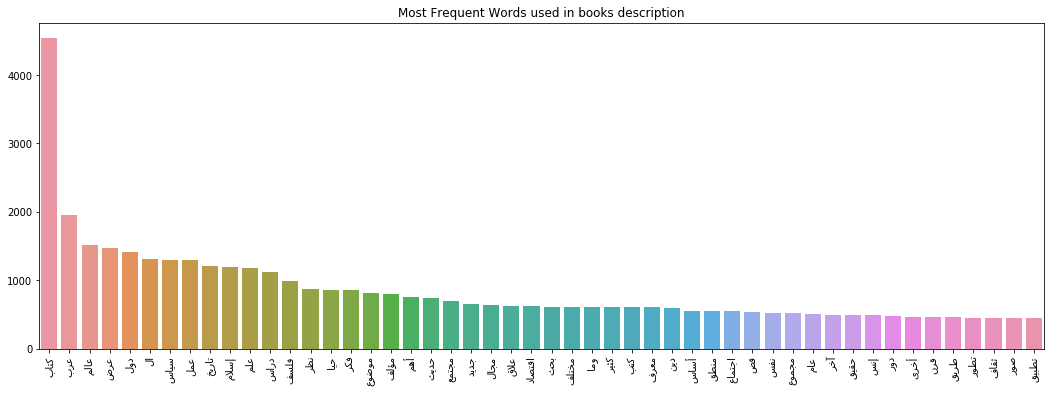

In [58]:
barplot(words=x, words_counts=common_words_counts, title='Most Frequent Words used in books description')

From the above bar chart, we can easily see that the ‘’ is the most frequent word in all books from this category.

After this, let’s do the reverse, by finding out least frequent 50 words/tokens in all books and plot the graph

In [62]:
def key_word_counter(tupple):
    return tupple[1]

all_word_counts = sorted(aggregate_counter.items(), key=key_word_counter)
uncommon_words = [word[0] for word in islice(all_word_counts, 100)]
uncommon_word_counts = [word[1] for word in islice(all_word_counts, 100)]    

In [63]:
import arabic_reshaper
import matplotlib.pyplot as plt
from bidi.algorithm import get_display
y = [ ]

for item in uncommon_words:
    y.append(get_display(arabic_reshaper.reshape(item)))

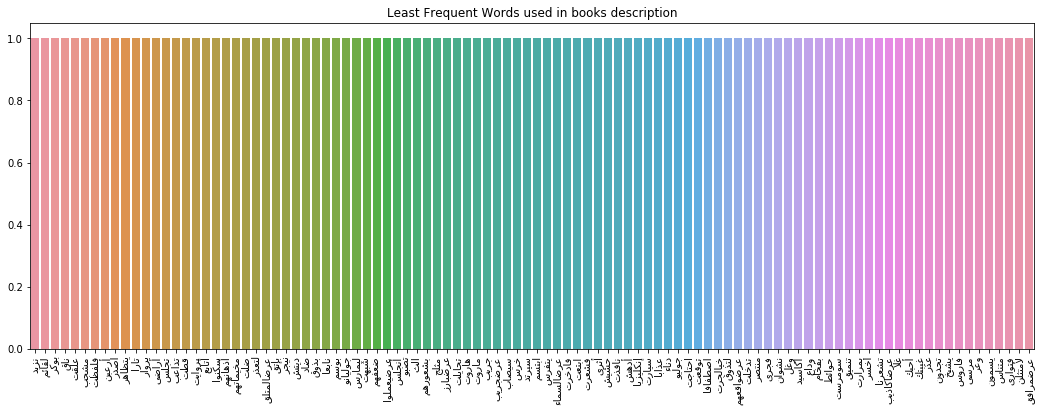

In [64]:
barplot(words=y, words_counts=uncommon_word_counts, title='Least Frequent Words used in books description')

In [65]:
df['Description2_Parsed_20']=""
for i in range(len(df)):
    sentence = []
    for w in df.Description2_Parsed_13[i]:
        if w not in uncommon_words:
            sentence.append(w)
    df.set_value(i, 'Description2_Parsed_20', sentence)

/Users/lamiaeaitmbirik/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  import sys


In [66]:
def string_unlist(strlist):
    return " ".join(strlist)

df["Description2_Parsed_20_unlist"] = df["Description2_Parsed_20"].apply(string_unlist)

We can see a lot of words/tokens are there with frequency 1.

- Conversion of texts to Vector Space Model

There are many ‘Vector Space Models’ for text analysis like ‘Tf-Idf’, ‘CBOW’, ‘Word2Vec’, ‘Doc2Vec’ ..

‘Tf-Idf’ is a simple frequency-inverse frequency-based model and very useful in case of small and domain-specific texts. It is very good in understanding texts which contain domain heavy terms and are not very well written or grammatically correct. But it fails to understand the contextual meaning especially for very well written & grammatically correct texts. The same mood can be expressed using different words.

‘Doc2Vec’ & ‘Word2Vec’ are the clear winner over here. ‘Doc2Vec’ randomly samples words from texts and trains one Neural Network model internally which gives numerical vector representation of the text. In our case, as movie plots are well-written texts, will use ‘Doc2Vec’ as our ‘Vector Space Model’.
Let’s write a transformer which converts text corpus into document vectors.

In [312]:
from gensim.models.doc2vec import TaggedDocument, Doc2Vec
from gensim.parsing.preprocessing import preprocess_string
from sklearn.base import BaseEstimator
from sklearn import utils as skl_utils
from tqdm import tqdm

import multiprocessing
import numpy as np

class Doc2VecTransformer(BaseEstimator):

    def __init__(self, vector_size=100, learning_rate=0.02, epochs=20):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self._model = None
        self.vector_size = vector_size
        self.workers = multiprocessing.cpu_count() - 1

    def fit(self, df_x, df_y=None):
        tagged_x = [TaggedDocument(str(row['Description2_Parsed_13_unlist']).split(), [index]) for index, row in df_x.iterrows()]
        model = Doc2Vec(documents=tagged_x, vector_size=self.vector_size, workers=self.workers)

        for epoch in range(self.epochs):
            model.train(skl_utils.shuffle([x for x in tqdm(tagged_x)]), total_examples=len(tagged_x), epochs=1)
            model.alpha -= self.learning_rate
            model.min_alpha = model.alpha

        self._model = model
        return self

    def transform(self, df_x):
        return np.asmatrix(np.array([self._model.infer_vector(str(row['Description2_Parsed_13_unlist']).split())
                                     for index, row in df_x.iterrows()]))

In [313]:
df1=df[['Description2_Parsed_13_unlist','Title']]

In [314]:
doc2vec_tr = Doc2VecTransformer(vector_size=300)
doc2vec_tr.fit(df1)
doc2vec_vectors = doc2vec_tr.transform(df1)

100%|██████████| 4443/4443 [00:00<00:00, 2017898.50it/s]


- Training an ‘Auto-Encoder’ neural network

As our process is completely unsupervised, we will use 5-layer deep ‘Auto-encoder’ neural network to train our model. It is a special type of neural network which copies input data to output data. This process is known as ‘reconstruction’. ‘Hidden layers’ of the network does the feature extraction & decoding work. At the end of the entire process definitely, some loss gets generated and the data point which is dissimilar from others incurs more loss.

Now, let’s see practically how this will work on ‘Doc2Vec’ data

In [315]:
from sklearn.neural_network import MLPRegressor

auto_encoder = MLPRegressor(hidden_layer_sizes=(
                                                 600,
                                                 150, 
                                                 600,
                                               ))
auto_encoder.fit(doc2vec_vectors, doc2vec_vectors)
predicted_vectors = auto_encoder.predict(doc2vec_vectors)

In [316]:
auto_encoder.score(predicted_vectors, doc2vec_vectors)

/Users/lamiaeaitmbirik/opt/anaconda3/lib/python3.7/site-packages/sklearn/base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


0.9972187819034337

- Similarity measure with output and actual work

In [534]:
from scipy.spatial.distance import cosine

def key_consine_similarity(tupple):
    return tupple[1]

def get_computed_similarities(vectors, predicted_vectors, reverse=False):
    data_size = len(df1)
    cosine_similarities = []
    for i in range(data_size):
        cosine_sim_val = (1 - cosine(vectors[i], predicted_vectors[i]))
        cosine_similarities.append((i, cosine_sim_val))

    return sorted(cosine_similarities, key=key_consine_similarity, reverse=reverse)

L5 = []

def display_top_n(sorted_cosine_similarities, n=22):
    for i in range(n):
        index, consine_sim_val = sorted_cosine_similarities[i]
        L5.append(df1.iloc[index, 1])
        print('Book Description: ', df1.iloc[index, 0])  
        print('Cosine Sim Val :', consine_sim_val)
        print('---------------------------------')

We can call the above functions in order to get top ‘k’ outliers

In [535]:
sorted_cosine_similarities = get_computed_similarities(vectors=doc2vec_vectors, predicted_vectors=predicted_vectors)
display_top_n(sorted_cosine_similarities=sorted_cosine_similarities)

Book Description:  لماذا كتاب لأن ثم تزاوج حاصل مارست تد عالم إسلام أس فلسف لسوق أنتجت تغير مفاهيم حشم الأ مال خير أناشيد بعض نماذج دعو إسلام معاصر إضاف ظهور مسأل خطالأمريك أدو تح عرضحال خير أناشيد بعض نماذج دعو إسلام معاصر إضاف ظهور مسأل خطالأمريك أدو تح
Cosine Sim Val : -0.17406164097804488
---------------------------------
Book Description:  أهم أسباب افساد شهو عيش قضاء شعور مرء بأن محبوب إنما يستشعر مرء لأسباب مختلف يعتبر سخيف ميسور يحب حرم طفولت عطف يغدق عاد أتراب يحب عرض ميسور يحب حرم طفولت عطف يغدق عاد أتراب يحب
Cosine Sim Val : -0.17170523441143937
---------------------------------
Book Description:  كتاب دراس تفصيل تضمنت سور حجر آداب ربان اسلام سواء اداب ال رسول مؤمن اخوان مؤمن كثير آي أخرى موزع قر كريم دلال بين اضح احكام فق توسعت استنباط عرضن كثير آي أخرى موزع قر كريم دلال بين اضح احكام فق توسعت استنباط
Cosine Sim Val : -0.17051605852963947
---------------------------------
Book Description:  مجموع قص تصور حيا خليل إبراهيم لامفوما لاقا سبيل دعو عباد ال حد طبع فخم ألو بأسلوب س

- Drop outliers

In [618]:
for w in L5:
    df.drop(df.index[df['Title'] == w], inplace = True)

# Feature Engineering

The next step is the feature engineering step. In this step, raw text data will be transformed into feature vectors and new features will be created using the existing dataset. We will implement the following different ideas in order to obtain relevant features from our dataset.
<br>
<br>
**2.1 Count Vectors as features<br>
2.2 TF-IDF Vectors as features<br>
2.3 Word Embeddings as features<br>
2.4 Text / NLP based features<br>
2.5 Topic Models as features**<br>
<br>
Lets look at the implementation of these ideas in detail.

**2.1 Count Vectors as feature**s<br>

Convert a collection of text documents to a matrix of token counts

In [14]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
# split the dataset into training and validation datasets 
train_x, test_x, train_y, test_y = train_test_split(df['Description2_Parsed_13_unlist'], df['Category'], test_size=0.2, random_state=0)
# label encode the target variable 
encoder = preprocessing.LabelEncoder()
train_y = encoder.fit_transform(train_y)
test_y = encoder.fit_transform(test_y)

In [7]:
from sklearn.feature_extraction.text import CountVectorizer

# create a count vectorizer object 
count_vect = CountVectorizer(analyzer='word', token_pattern=r'\w{1,}')
count_vect.fit(df['Description2_Parsed_13_unlist'])

# transform the training and validation data using count vectorizer object
xtrain_count =  count_vect.transform(train_x)
xtest_count =  count_vect.transform(test_x)

**2.2 TF-IDF Vectors as features**<br>

TF-IDF score represents the relative importance of a term in the document and the entire corpus. TF-IDF score is composed by two terms: the first computes the normalized Term Frequency (TF), the second term is the Inverse Document Frequency (IDF), computed as the logarithm of the number of the documents in the corpus divided by the number of documents where the specific term appears.

TF(t) = (Number of times term t appears in a document) / (Total number of terms in the document)
<br>
IDF(t) = log_e(Total number of documents / Number of documents with term t in it)


TF-IDF Vectors can be generated at different levels of input tokens (words, characters, n-grams)

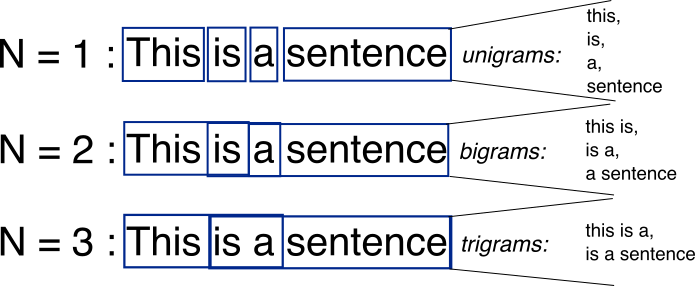

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer
# word level tf-idf
tfidf_vect = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', max_features=5000)
tfidf_vect.fit(df['Description2_Parsed_13_unlist'])
xtrain_tfidf =  tfidf_vect.transform(train_x)
xtest_tfidf =  tfidf_vect.transform(test_x)

# ngram level tf-idf 
tfidf_vect_ngram = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', ngram_range=(2,3), max_features=5000)
tfidf_vect_ngram.fit(df['Description2_Parsed_13_unlist'])
xtrain_tfidf_ngram =  tfidf_vect_ngram.transform(train_x)
xtest_tfidf_ngram =  tfidf_vect_ngram.transform(test_x)

# characters level tf-idf
tfidf_vect_ngram_chars = TfidfVectorizer(analyzer='char', token_pattern=r'\w{1,}', ngram_range=(2,3), max_features=5000)
tfidf_vect_ngram_chars.fit(df['Description2_Parsed_13_unlist'])
xtrain_tfidf_ngram_chars =  tfidf_vect_ngram_chars.transform(train_x) 
xtest_tfidf_ngram_chars =  tfidf_vect_ngram_chars.transform(test_x) 

/Users/mustaphaamine/anaconda3/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:524: UserWarning: The parameter 'token_pattern' will not be used since 'analyzer' != 'word'
  warnings.warn("The parameter 'token_pattern' will not be used"


In [543]:
xtrain_tfidf

<3533x5000 sparse matrix of type '<class 'numpy.float64'>'
	with 109511 stored elements in Compressed Sparse Row format>

In [9]:
df['char_count'] = df['Description2_Parsed_13_unlist'].apply(len)
df['word_count'] = df['Description2_Parsed_13_unlist'].apply(lambda x: len(x.split()))
df['word_density'] = df['char_count'] / (df['word_count']+1)

**2.5 Topic Models as features**<br>



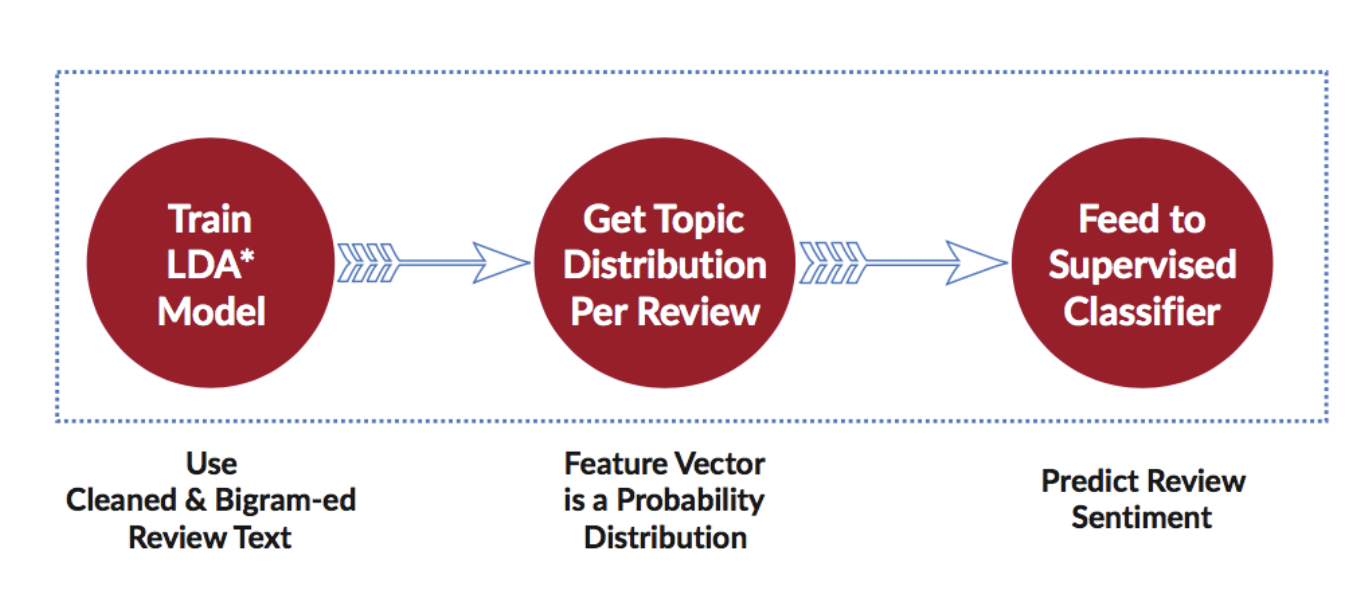

In [10]:
from sklearn import decomposition 
# train a LDA Model
lda_model = decomposition.LatentDirichletAllocation(n_components=20, learning_method='online', max_iter=20)
X_topics = lda_model.fit_transform(xtrain_count)
topic_word = lda_model.components_ 
vocab = count_vect.get_feature_names()

# view the topic models
n_top_words = 10
topic_summaries = []
for i, topic_dist in enumerate(topic_word):
    topic_words = np.array(vocab)[np.argsort(topic_dist)][:-(n_top_words+1):-1]
    topic_summaries.append(' '.join(topic_words))

In [11]:
def train_model(classifier, feature_vector_train, label, feature_vector_test, is_neural_net=False):
    # fit the training dataset on the classifier
    classifier.fit(feature_vector_train, label)
    
    # predict the labels on validation dataset
    predictions = classifier.predict(feature_vector_test)
    
    if is_neural_net:
        predictions = predictions.argmax(axis=-1)
    
    return metrics.accuracy_score(predictions, test_y)

## Model building 

### Naive Bayes

In [327]:
from sklearn import naive_bayes
from sklearn import metrics 
# Naive Bayes on Count Vectors
accuracy = train_model(naive_bayes.MultinomialNB(), xtrain_count, train_y, xtest_count)
print("NB, Count Vectors: ", accuracy)

# Naive Bayes on Word Level TF IDF Vectors
accuracy = train_model(naive_bayes.MultinomialNB(), xtrain_tfidf, train_y, xtest_tfidf)
print("NB, WordLevel TF-IDF: ", accuracy)

# Naive Bayes on Ngram Level TF IDF Vectors
accuracy = train_model(naive_bayes.MultinomialNB(), xtrain_tfidf_ngram, train_y, xtest_tfidf_ngram)
print("NB, N-Gram Vectors: ", accuracy)

# Naive Bayes on Character Level TF IDF Vectors
accuracy = train_model(naive_bayes.MultinomialNB(), xtrain_tfidf_ngram_chars, train_y, xtest_tfidf_ngram_chars)
print("NB, CharLevel Vectors: ", accuracy)

NB, Count Vectors:  0.5859728506787331
NB, WordLevel TF-IDF:  0.5701357466063348
NB, N-Gram Vectors:  0.4242081447963801
NB, CharLevel Vectors:  0.5361990950226244


### Linear Classifier

In [328]:
from sklearn import linear_model
# Linear Classifier on Count Vectors
accuracy = train_model(linear_model.LogisticRegression(), xtrain_count, train_y, xtest_count)
print("LR, Count Vectors: ", accuracy)

# Linear Classifier on Word Level TF IDF Vectors
accuracy = train_model(linear_model.LogisticRegression(), xtrain_tfidf, train_y, xtest_tfidf)
print("LR, WordLevel TF-IDF: ", accuracy)

# Linear Classifier on Ngram Level TF IDF Vectors
accuracy = train_model(linear_model.LogisticRegression(), xtrain_tfidf_ngram, train_y, xtest_tfidf_ngram)
print("LR, N-Gram Vectors: ", accuracy)

# Linear Classifier on Character Level TF IDF Vectors
accuracy = train_model(linear_model.LogisticRegression(), xtrain_tfidf_ngram_chars, train_y, xtest_tfidf_ngram_chars)
print("LR, CharLevel Vectors: ", accuracy)

/Users/lamiaeaitmbirik/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/lamiaeaitmbirik/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LR, Count Vectors:  0.5995475113122172
LR, WordLevel TF-IDF:  0.6018099547511312
LR, N-Gram Vectors:  0.4117647058823529
LR, CharLevel Vectors:  0.581447963800905


### Implementing a SVM Model

In [332]:
from sklearn import svm
accuracy = train_model(svm.SVC(), xtrain_tfidf_ngram, train_y, xtest_tfidf_ngram_chars)
print ("SVM, N-Gram Vectors: ", accuracy)

/Users/lamiaeaitmbirik/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVM, N-Gram Vectors:  0.14479638009049775


### Random Forest Model

In [335]:
from sklearn import ensemble
from sklearn.ensemble import RandomForestRegressor

# RF on Count Vectors
accuracy = train_model(ensemble.RandomForestClassifier(), xtrain_count, train_y, xtest_count)
print ("RF, Count Vectors: ", accuracy)

# RF on Word Level TF IDF Vectors
accuracy = train_model(ensemble.RandomForestClassifier(), xtrain_tfidf, train_y, xtest_tfidf)
print ("RF, WordLevel TF-IDF: ", accuracy)

/Users/lamiaeaitmbirik/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RF, Count Vectors:  0.502262443438914


/Users/lamiaeaitmbirik/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RF, WordLevel TF-IDF:  0.5101809954751131


### Boosting 

In [13]:
import xgboost
from sklearn import metrics 

# Extereme Gradient Boosting on Count Vectors
accuracy = train_model(xgboost.XGBClassifier(), xtrain_count.tocsc(), train_y, xtest_count.tocsc())
print ("Xgb, Count Vectors: ", accuracy)

# Extereme Gradient Boosting on Word Level TF IDF Vectors
accuracy = train_model(xgboost.XGBClassifier(), xtrain_tfidf.tocsc(), train_y, xtest_tfidf.tocsc())
print ("Xgb, WordLevel TF-IDF: ", accuracy)

# Extereme Gradient Boosting on Character Level TF IDF Vectors
accuracy = train_model(xgboost.XGBClassifier(), xtrain_tfidf_ngram_chars.tocsc(), train_y, xtest_tfidf_ngram_chars.tocsc())
print ("Xgb, CharLevel Vectors: ", accuracy)

Xgb, Count Vectors:  0.5163104611923509
Xgb, WordLevel TF-IDF:  0.5039370078740157
Xgb, CharLevel Vectors:  0.5646794150731158


### Linear Support Vector Machine

In [361]:
from sklearn.linear_model import SGDClassifier

sgd = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=5, tol=None)),
               ])
sgd.fit(X_train, y_train)

y_pred = sgd.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))

accuracy 0.5995475113122172


### LSTM

In [388]:
from keras.preprocessing.text import Tokenizer
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D



# The maximum number of words to be used. (most frequent)
MAX_NB_WORDS = 50000
# Max number of words in each complaint.
MAX_SEQUENCE_LENGTH = 250
# This is fixed.
EMBEDDING_DIM = 100

tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(df['Description2_Parsed_13_unlist'].values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 27480 unique tokens.


In [389]:
from keras.preprocessing.sequence import pad_sequences

X = tokenizer.texts_to_sequences(df['Description2_Parsed_13_unlist'].values)
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X.shape)

Shape of data tensor: (4417, 250)


In [390]:
Y = pd.get_dummies(df['Category']).values
print('Shape of label tensor:', Y.shape)

Shape of label tensor: (4417, 13)


In [391]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.10, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(3975, 250) (3975, 13)
(442, 250) (442, 13)


In [392]:
model = Sequential()
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(13, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())




Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 250, 100)          5000000   
_________________________________________________________________
spatial_dropout1d_1 (Spatial (None, 250, 100)          0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dense_1 (Dense)              (None, 13)                1313      
Total params: 5,081,713
Trainable params: 5,081,713
Non-trainable params: 0
_________________________________________________________________
None


In [394]:
from keras.callbacks import EarlyStopping
epochs = 5
batch_size = 64
history = model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size,validation_split=0.1,callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 3577 samples, validate on 398 samples
Epoch 1/5





3577/3577 [==============================] - 64s 18ms/step - loss: 2.4485 - acc: 0.1384 - val_loss: 2.3635 - val_acc: 0.1332
Epoch 2/5
3577/3577 [==============================] - 60s 17ms/step - loss: 2.3060 - acc: 0.2164 - val_loss: 2.1940 - val_acc: 0.2915
Epoch 3/5
3577/3577 [==============================] - 58s 16ms/step - loss: 1.7491 - acc: 0.4596 - val_loss: 1.9246 - val_acc: 0.3769
Epoch 4/5
3577/3577 [==============================] - 61s 17ms/step - loss: 1.1178 - acc: 0.6737 - val_loss: 1.7006 - val_acc: 0.4749
Epoch 5/5
3577/3577 [==============================] - 66s 18ms/step - loss: 0.7393 - acc: 0.8060 - val_loss: 1.8602 - val_acc: 0.4673


In [398]:
accr = model.evaluate(X_test,Y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

442/442 [==============================] - 2s 5ms/step
Test set
  Loss: 1.880
  Accuracy: 0.464


In [541]:
new_complaint = [' روايات تاريخ الإسلام" سلسلة من الروايات التاريخية تصور مراحل التاريخ الإسلامي منذ ظهور الإسلام روعي فيها عنصر التشويق مع التزام الحوادث التاريخ ية التزاماً دقيقاً من حيث الزمان والمكان والأشخاص مع وصف ما يتخللها من عادات وأخلاق وهذا الكتاب "عذراء قريش" يدخل ضمن كتب هذه السلسلة وهو يؤرخ لمقتل الخليفة عثمان بن عفان وخلافة الإمام علي، وما نجم عن ذلك من الفتنة وواقعتي الجمل وصفين إلى تحكيم الحكمين وخروج مصر من خلافة الإمام علي. عرضية التزاماً دقيقاً من حيث الزمان والمكان والأشخاص مع وصف ما يتخللها من عادات وأخلاق وهذا الكتاب "عذراء قريش" يدخل ضمن كتب هذه السلسلة وهو يؤرخ لمقتل الخليفة عثمان بن عفان وخلافة الإمام علي، وما نجم عن ذلك من الفتنة وواقعتي الجمل وصفين إلى تحكيم الحكمين وخروج مصر من خلافة الإمام علي.']
seq = tokenizer.texts_to_sequences(new_complaint)
padded = pad_sequences(seq, maxlen=MAX_SEQUENCE_LENGTH)
pred = model.predict(padded)
labels = ['الأدب والخيال','الفلسفة','الكتب الإسلامية','الكتب الإسلامية','الكتب السياسية','الاقتصاد والأعمال','العلوم والطبيعة','الأسرة والطفل','الصحافة والإعلام','السير والمذكرات','الفنون','التاريخ والجغرافيا','الرياضة والتسلية','الشرع والقانون']
print(pred, labels[np.argmax(pred)])

[[8.4233683e-01 2.6089227e-02 2.4774340e-03 5.7686609e-03 2.2080527e-03
  5.3171091e-02 2.2299297e-03 6.3566666e-04 1.1213726e-02 3.5303833e-03
  9.9439789e-03 2.4777956e-02 1.5617032e-02]] الأدب والخيال


## Similarity 

In [548]:
import gensim 
from scipy import spatial
from gensim import corpora
from gensim import models

In [549]:
class TextSimilarity:

    def __init__(self):
        try:
            self.model = gensim.models.KeyedVectors.load_word2vec_format('/Users/lamiaeaitmbirik/Desktop/wiki.ar.vec')
            self.index2word_set = set(self.model.wv.index2word)
        except FileNotFoundError:
            raise FileNotFoundError
    def avg_feature_vector(self, sentence, num_features=300):
        words = word_tokenize(sentence)
        feature_vec = np.zeros((num_features, ), dtype='float32')
        n_words = 0
        for word in words:
            if word in self.index2word_set:
                n_words += 1
                feature_vec = np.add(feature_vec, self.model[word])
        if (n_words > 0):
            feature_vec = np.divide(feature_vec, n_words)
        return feature_vec

    def similarity(self, sentence1, sentence2):
        vec1, vec2 = self.avg_feature_vector(sentence1), self.avg_feature_vector(sentence2)
        return self.cosine_similarity(vec1, vec2)

    def cosine_similarity(self, vec1, vec2):
        return 1 - spatial.distance.cosine(vec1, vec2)

In [587]:
labels

['الأدب والخيال',
 'الفلسفة',
 'الكتب الإسلامية',
 'الكتب الإسلامية',
 'الكتب السياسية',
 'الاقتصاد والأعمال',
 'العلوم والطبيعة',
 'الأسرة والطفل',
 'الصحافة والإعلام',
 'السير والمذكرات',
 'الفنون',
 'التاريخ والجغرافيا',
 'الرياضة والتسلية',
 'الشرع والقانون']

In [598]:
sim = TextSimilarity()
label = ['ادب خيال',
 'فلسف',
 'كتب اسلام',
 'كتب سياس',
 'اقتصاد اعمال',
 'علوم طبيع',
 'اسر طفل',
 'صحاف اعلام',
 'سير مذكر',
 'فنون',
 'تاريخ جغرافيا',
 'رياضة تسلي',
 'شرع قانون']

Distance =[]
for k in range(len(label)):
    Distance.append(sim.similarity(df.Description2_Parsed_13_unlist[0],labels[k]))   

/Users/lamiaeaitmbirik/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  


In [599]:
Distance 

[0.315705269575119,
 0.34692391753196716,
 0.5143725872039795,
 0.5143725872039795,
 0.4446641504764557,
 0.30296775698661804,
 0.37629958987236023,
 0.3617786169052124,
 0.34503185749053955,
 0.27172598242759705,
 0.30259111523628235,
 0.3223835527896881,
 0.3136516809463501]

In [607]:
df.Description2_Parsed_12_unlist[900]

'تفتقر المكتبة العربيه لكتب صناعة العطور يضم الكتاب معلومات احترافية مبسطة لكثير مدارس العطور الشرقية والاوربية يساعد تصميم طور مبتكرة يساعد انشاء مشاريع اكتفاء ذاتي مستهلك فتح افاق تنافسية المجال عطور مبتكرة يساعد انشاء مشاريع اكتفاء ذاتي مستهلك فتح افاق تنافسية المجال'

In [600]:
def string_unlist(strlist):
    return " ".join(strlist)

df["Description2_Parsed_12_unlist"] = df["Description_Parsed_12"].apply(string_unlist)

In [649]:
sim = TextSimilarity()

Distance2 =[]
for k in range(len(label)):
    Distance2.append(sim.similarity(df.Description2_Parsed_12_unlist[2200],labels[k]))   

/Users/lamiaeaitmbirik/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  


In [650]:
Distance2

[0.44682031869888306,
 0.38616347312927246,
 0.4740062355995178,
 0.4740062355995178,
 0.5356822609901428,
 0.553030252456665,
 0.5219475626945496,
 0.4382127523422241,
 0.507429301738739,
 0.42613473534584045,
 0.36583060026168823,
 0.42284685373306274,
 0.5187418460845947]